### 1. EDA(탐색적 데이터 분석)


### 1-1. 데이터 로드 

In [261]:
import pandas as pd 

# 데이터 로드 
df = pd.read_csv('./data/Life-Expectancy-Data-Averaged.csv')

# 데이터 정보 확인 
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      180 non-null    object 
 1   Region                       180 non-null    object 
 2   Year                         180 non-null    float64
 3   Infant_deaths                180 non-null    float64
 4   Under_five_deaths            180 non-null    float64
 5   Adult_mortality              180 non-null    float64
 6   Alcohol_consumption          180 non-null    float64
 7   Hepatitis_B                  180 non-null    float64
 8   Measles                      180 non-null    float64
 9   BMI                          180 non-null    float64
 10  Polio                        180 non-null    float64
 11  Diphtheria                   180 non-null    float64
 12  Incidents_HIV                180 non-null    float64
 13  GDP_per_capita      

In [262]:
# 결측값 확인 
print(df.isnull().sum())

Country                        0
Region                         0
Year                           0
Infant_deaths                  0
Under_five_deaths              0
Adult_mortality                0
Alcohol_consumption            0
Hepatitis_B                    0
Measles                        0
BMI                            0
Polio                          0
Diphtheria                     0
Incidents_HIV                  0
GDP_per_capita                 0
Population_mln                 0
Thinness_ten_nineteen_years    0
Thinness_five_nine_years       0
Schooling                      0
Economy_status                 0
Life_expectancy                0
dtype: int64


* 결측값 없음

### 이상치 처리

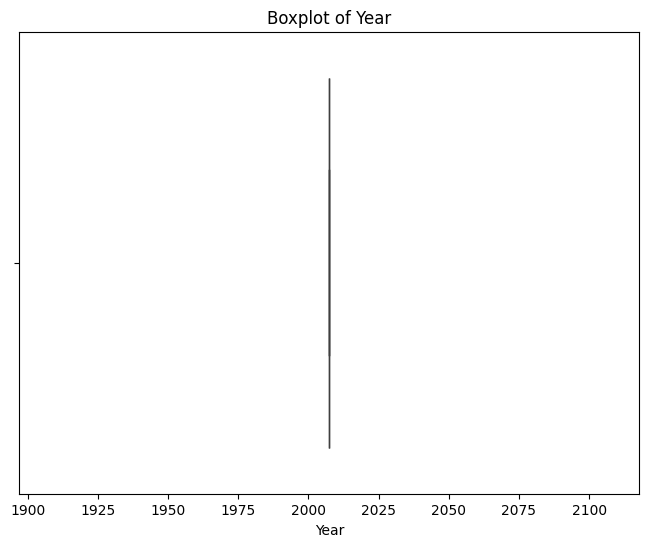

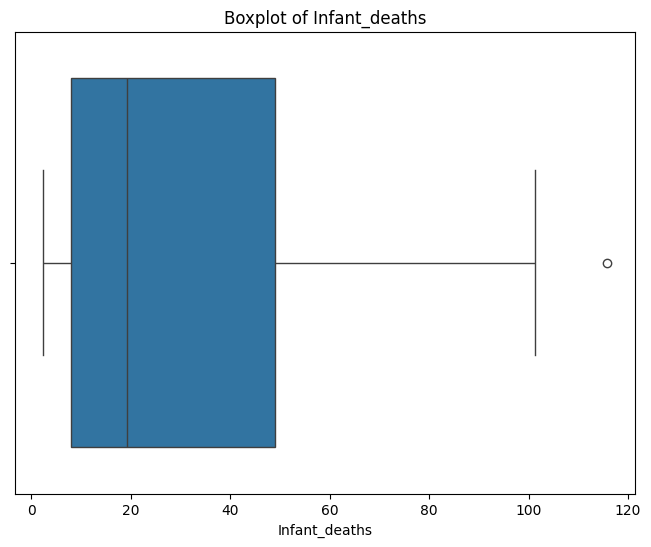

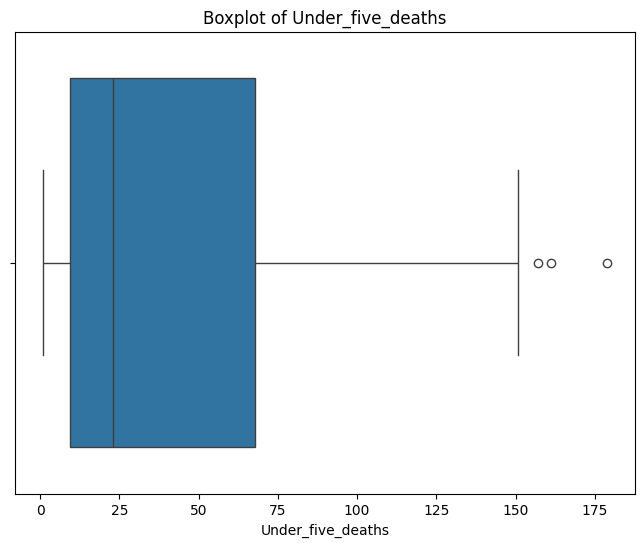

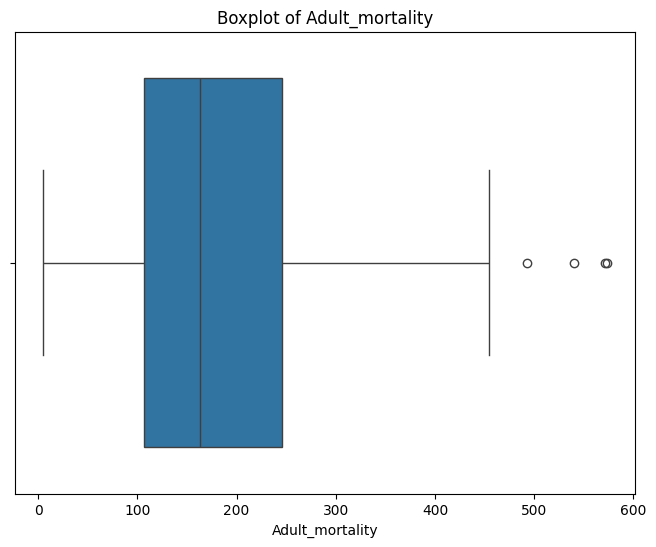

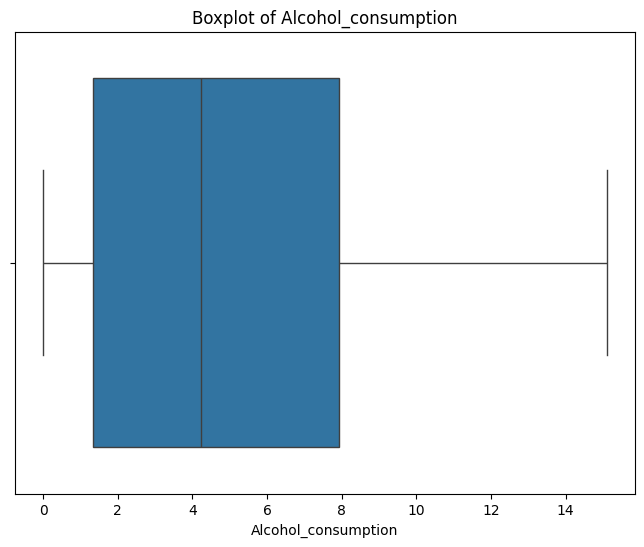

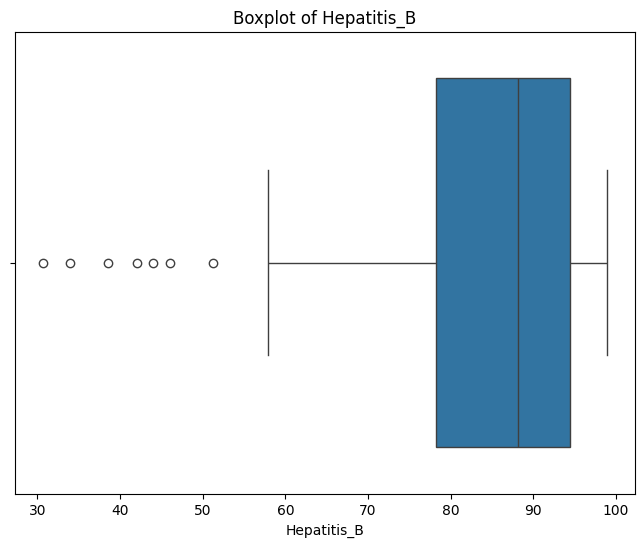

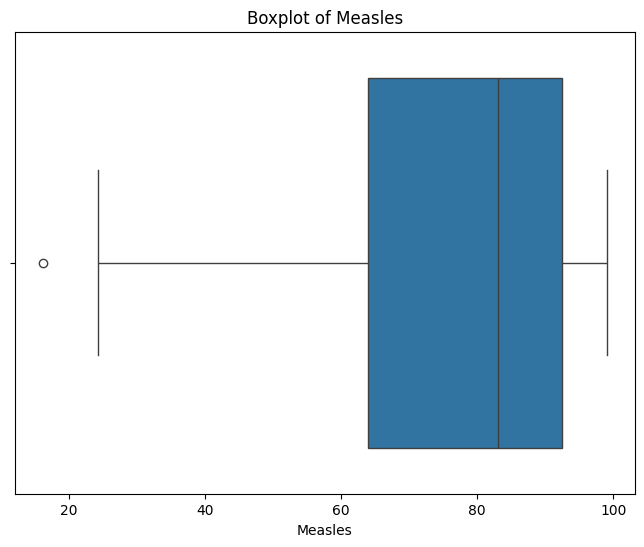

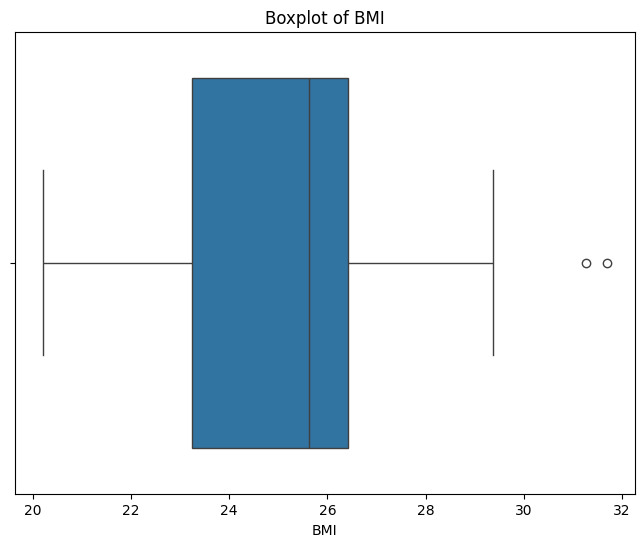

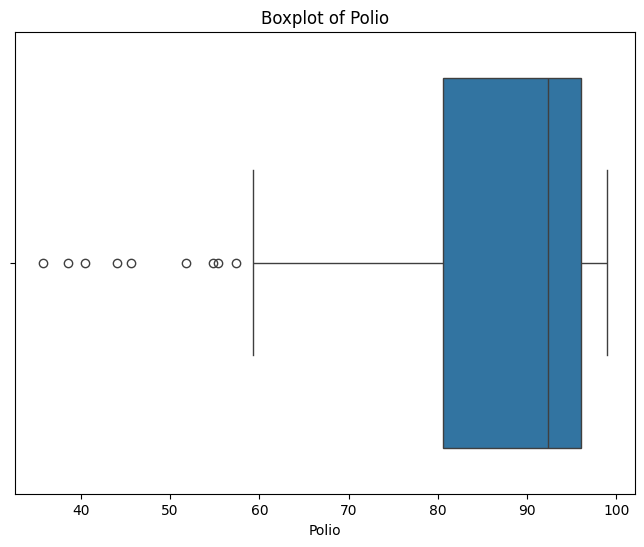

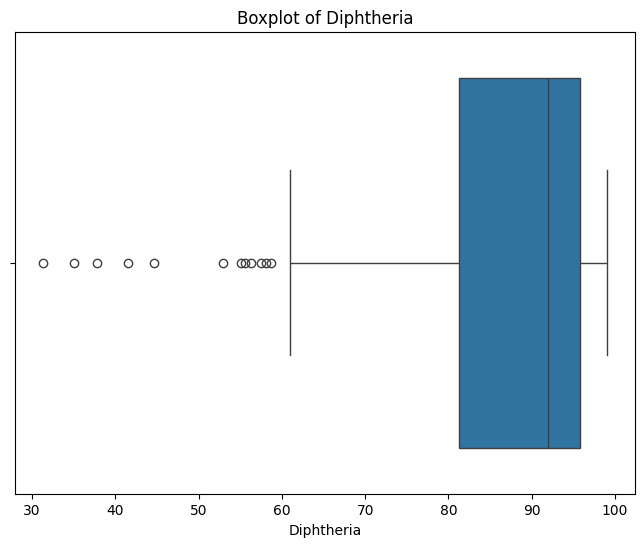

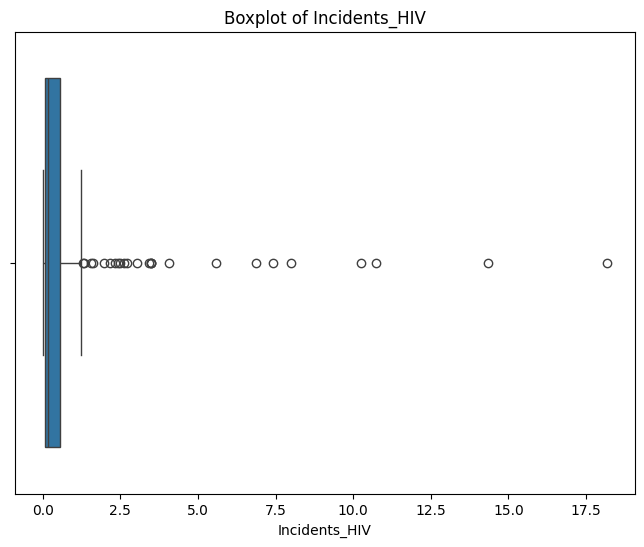

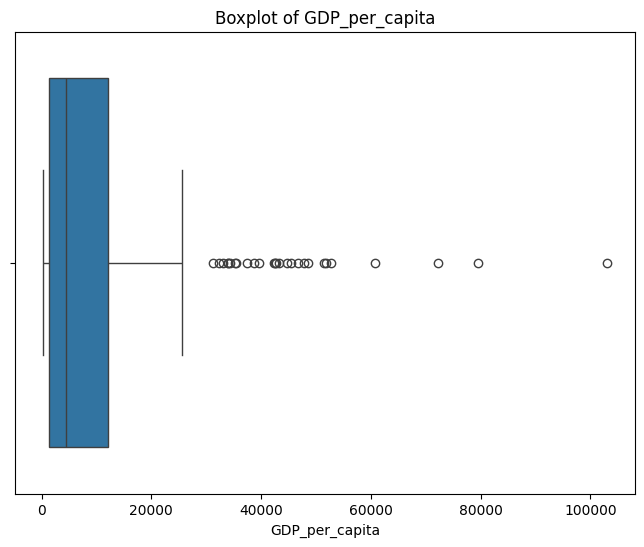

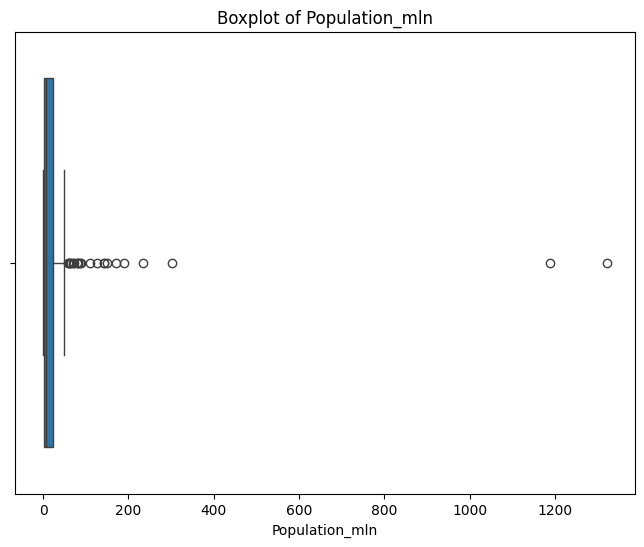

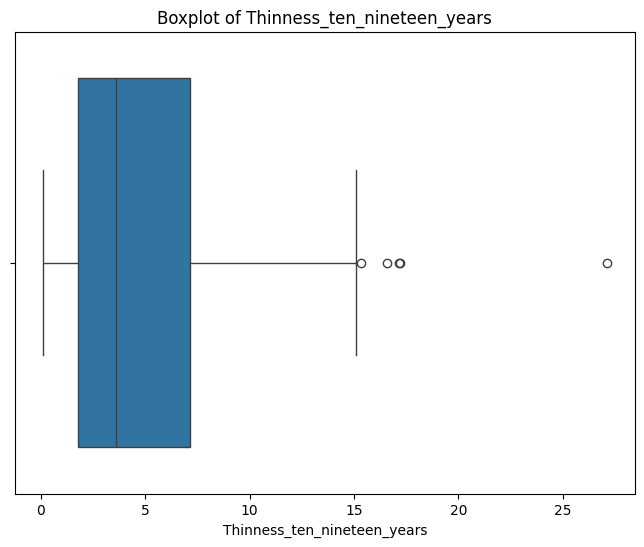

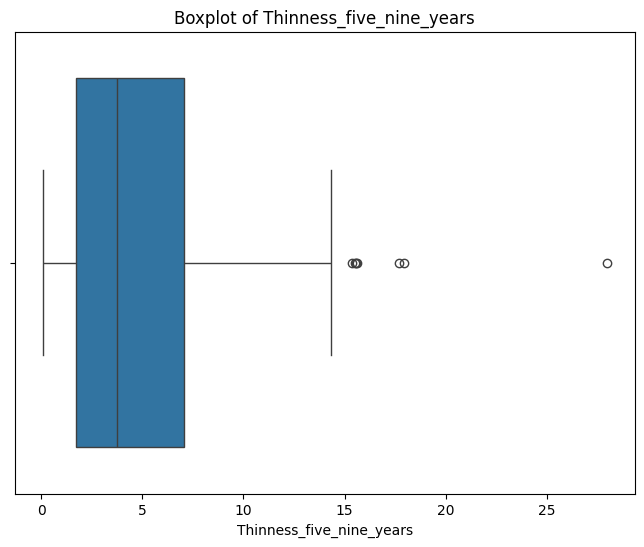

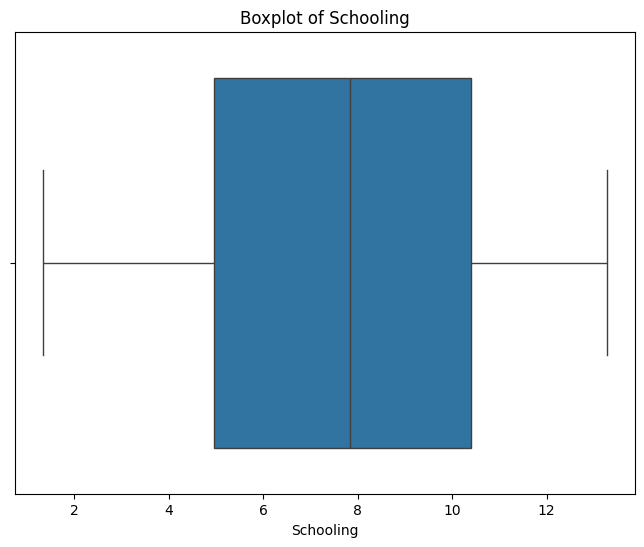

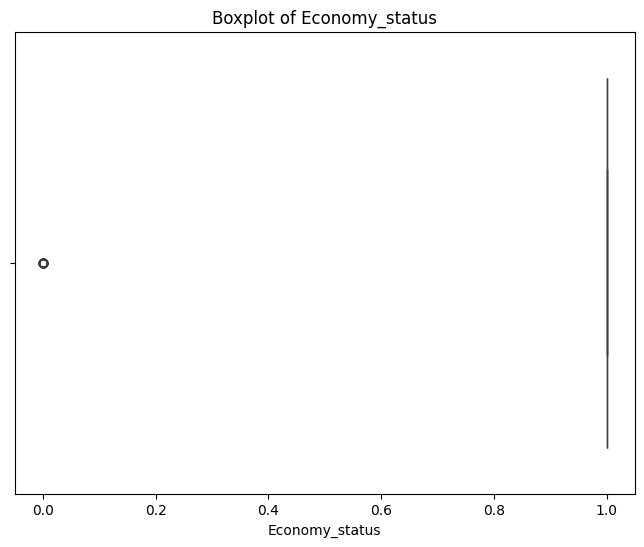

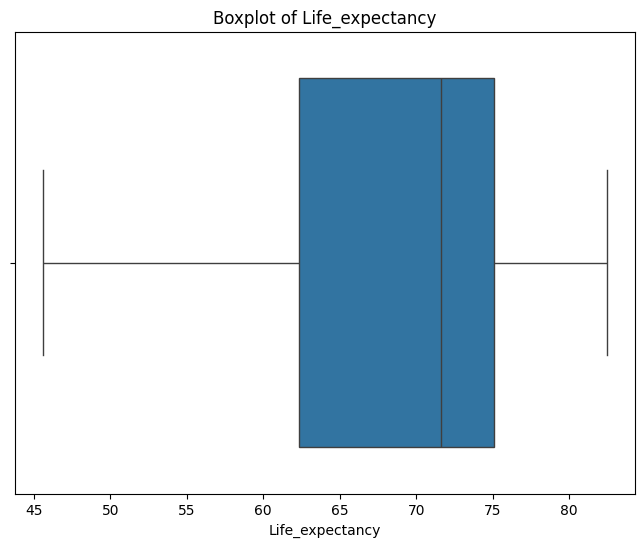

In [263]:
import seaborn as sns
import matplotlib.pyplot as plt

# 이상치 확인을 위한 상자그림
def plot_boxplot(df, column):
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

# 각 변수에 대해 상자그림 그리기
for column in df.select_dtypes(include=['float64', 'int64']).columns:  # 숫자형 변수들만 선택
    plot_boxplot(df, column)

In [264]:
# IQR을 이용한 이상치 탐지
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # 이상치 구하기
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# 각 변수에 대해 이상치 찾기
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    outliers = detect_outliers(df, column)
    print(f"Number of outliers in {column}: {len(outliers)}")
    
    # 이상치가 포함된 'Country'와 해당 값 출력
    print(outliers[['Country', column]])  # 'Country' 칼럼과 이상치가 있는 칼럼 출력


Number of outliers in Year: 0
Empty DataFrame
Columns: [Country, Year]
Index: []
Number of outliers in Infant_deaths: 1
          Country  Infant_deaths
141  Sierra Leone      115.71875
Number of outliers in Under_five_deaths: 3
          Country  Under_five_deaths
32           Chad          156.94375
141  Sierra Leone          178.72500
146       Somalia          161.26875
Number of outliers in Adult_mortality: 4
                      Country  Adult_mortality
31   Central African Republic       493.015156
54                   Eswatini       539.565812
92                    Lesotho       571.072719
178                  Zimbabwe       572.974312
Number of outliers in Alcohol_consumption: 0
Empty DataFrame
Columns: [Country, Alcohol_consumption]
Index: []
Number of outliers in Hepatitis_B: 7
                      Country  Hepatitis_B
30                     Canada      33.9375
31   Central African Republic      43.9375
32                       Chad      30.6875
51          Equatorial Guin

### 각 변수에 대한 분석 및 인사이트
* Year (연도)

- 이상치 없음: 데이터가 모두 2007년으로 일관되며, 이상치가 없음. Year 변수는 모델링에 영향 x.

* Infant_deaths (영아 사망률)

- 이상치: Sierra Leone에서 115.72로 이상치가 발생.
- Sierra Leone는 내전 중인 국가이다. 따라서 영아 사망률이 높을 수 밖에 없다고 판단. 이상치를 제거하지 않기로 함.

* Under_five_deaths (5세 이하 사망률)

- 이상치: Chad, Sierra Leone, Somalia에서 이상치가 발생.
- 아프리카 국가들인 Chad, Sierra Leone, Somalia에서 높은 사망률이 발생. 이는 보건의료 시스템이 취약하거나 경제적 어려움이 큰 나라들에서 나타나는 현상이라 판단. 
현실적인 데이터라 이상치를 제거할 필요가 없이 기대 수명에 영향을 주는 요인이라 판단.

* Adult_mortality (성인 사망률)

- 이상치: Central African Republic, Eswatini, Lesotho, Zimbabwe에서 이상치가 발생.
- 이들 국가들은 높은 성인 사망률을 기록하고 있으며, 이는 보건 환경과 의료 시스템의 부족, 전쟁 등의 영향을 받았을 수 있습니다. 이 국가의 데이터 또한 현실적인 데이터라 판단. 이상치에 대한 처리를 하지 않음

* Alcohol_consumption (알콜 소비량)

- 이상치 없음

* Hepatitis_B (B형 간염 백신 접종률)

- 이상치: Canada, Central African Republic, Chad 등에서 이상치가 발생.
- 백신 접종률이 지나치게 높거나 낮은 경우가 발생.

_추가 조사후 이상치에 대한 처리 필요_

* Measles (홍역 발생 건수)

- 이상치: Suriname에서 16.25로 이상치가 발생.
- 이는 상대적으로 작은 나라에서 큰 폭의 홍역 발생이 일어났다는 점에서, 해당 데이터의 정확성을 재검토하거나, 모델링에 반영할 때 주의할 필요가 있습니다.

* BMI (체질량지수)

- 이상치: Samoa와 Tonga에서 이상치가 발생.
- 이상치가 존재할 수 있는 국가라고 판단. 

* Polio (소아마비 백신 접종률)

- 이상치: Afghanistan, Angola, Central African Republic 등에서 이상치가 발생.
- 해당 데이터는 중요한 보건 인프라 문제를 나타낼 수 있으므로, 모델링에 반영하는 것이 중요.

* Diphtheria (디프테리아 백신 접종률)

- 이상치: 여러 국가에서 이상치가 발생.
- 소아마비와 마찬가지로 디프테리아 백신 접종률이 낮은 국가들이 존재. 이러한 데이터는 보건 인프라가 부족한 국가들을 분석하는 데 사용.

* Incidents_HIV (HIV 발생 사건 수)

- 이상치: Angola, Botswana, Eswatini, South Africa 등에서 이상치가 발생.
- HIV 발생 건수의 높은 값은 해당 국가들이 높은 감염률을 기록. 이 데이터는 보건 정책이나 예방 프로그램의 효과를 평가하는 데 중요.

* GDP_per_capita (1인당 GDP)

- 이상치: 여러 국가에서 이상치가 발생했습니다.
- 매우 높은 GDP를 기록한 국가들에서 이상치가 발생. 현실적인 데이터라고 판단. 특별한 처리를 하지 않음 

* Population_mln (인구 수)

- 이상치: China, India, United States 등에서 이상치가 발생.
- 대규모 인구를 보유한 국가들이라고 판단. 특별한 처리를 하지 않음 

* Thinness_ten_nineteen_years (10-19세의 비만도)

- 이상치: Afghanistan, Bhutan, India, Nepal, Sri Lanka 등에서 이상치가 발생.
- 특별한 처리를 하지 않음.

* Thinness_five_nine_years (5-9세의 비만도)

- 이상치: Afghanistan, Bhutan, India, Nepal, Pakistan, Sri Lanka, Vietnam 등에서 이상치가 발생.
- 비만도 데이터에서 이러한 이상치는 특히 아시아와 아프리카 국가들에서 관찰. 현실적인 데이터라고 판단
- 앞의 10~19세의 비만도와 유사한 결과라 이상치가 아니라 국가별 측징이라고 해석

* Schooling (학교 교육 연수)

- 이상치 없음

* Economy_status (경제 상태)

- 이상치: 많은 국가에서 이상치가 발생했습니다. 
- 0과 1로만 이루어진 데이터라 그런 것으로 확인. 다른 처리를 하지 않음

* Life_expectancy (기대수명)

이상치 없음: 기대수명에서 이상치가 없다는 것은 데이터가 현실적으로 정확하다는 것을 의미. 다른 컬럼 값에 특별한 처리를 하지 않기로 결정

* 결론: 수치형 데이터에서 특별한 이상치 처리를 하지 않음. 
경제적, 문화적, 보건 정책적인 상황을 판단하는 지표로 활용하기로 함 

### 인코딩

In [265]:
# 'Region'과 'Country'의 고유 값 개수 확인
unique_regions = df['Region'].nunique()  # 고유 값의 개수
unique_countries = df['Country'].nunique()  # 고유 값의 개수

print(f"Unique regions: {unique_regions}")
print(f"Unique countries: {unique_countries}")

Unique regions: 9
Unique countries: 180


In [266]:
# Region에 대해 원-핫 인코딩 적용
df_region_encoded = pd.get_dummies(df['Region'], prefix='Region')

# 원-핫 인코딩된 DataFrame과 기존 DataFrame을 합침
df = pd.concat([df, df_region_encoded], axis=1)

# 결과 확인
df.head()


,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Life_expectancy,Region_Africa,Region_Asia,Region_Central America and Caribbean,Region_European Union,Region_Middle East,Region_North America,Region_Oceania,Region_Rest of Europe,Region_South America
0,Afghanistan,Asia,2007.5,71.08125,98.61250,265.804969,0.016125,64.5625,24.3750,22.46250,...,59.65625,False,True,False,False,False,False,False,False,False
1,Albania,Rest of Europe,2007.5,15.25625,17.14375,83.132969,4.696875,98.0000,95.9375,25.85625,...,75.95000,False,False,False,False,False,False,False,True,False
2,Algeria,Africa,2007.5,26.75625,31.19375,113.439281,0.400625,88.3125,93.2500,24.86875,...,73.78750,True,False,False,False,False,False,False,False,False
3,Angola,Africa,2007.5,88.76875,144.16250,297.844063,4.935625,68.8125,64.0000,22.51875,...,52.82500,True,False,False,False,False,False,False,False,False
4,Antigua and Barbuda,Central America and Caribbean,2007.5,9.47500,11.51875,142.478813,7.755000,98.2500,75.4375,25.85000,...,75.35000,False,False,True,False,False,False,False,False,False


In [267]:
from sklearn.preprocessing import LabelEncoder

# 'Country'에 라벨 인코딩 적용
label_encoder = LabelEncoder()
df['Country_encoded'] = label_encoder.fit_transform(df['Country'])

# 결과 확인
df[['Country', 'Country_encoded']].head()

# 최종 데이터프레임 확인
df.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Region_Africa,Region_Asia,Region_Central America and Caribbean,Region_European Union,Region_Middle East,Region_North America,Region_Oceania,Region_Rest of Europe,Region_South America,Country_encoded
0,Afghanistan,Asia,2007.5,71.08125,98.61250,265.804969,0.016125,64.5625,24.3750,22.46250,...,False,True,False,False,False,False,False,False,False,0
1,Albania,Rest of Europe,2007.5,15.25625,17.14375,83.132969,4.696875,98.0000,95.9375,25.85625,...,False,False,False,False,False,False,False,True,False,1
2,Algeria,Africa,2007.5,26.75625,31.19375,113.439281,0.400625,88.3125,93.2500,24.86875,...,True,False,False,False,False,False,False,False,False,2
3,Angola,Africa,2007.5,88.76875,144.16250,297.844063,4.935625,68.8125,64.0000,22.51875,...,True,False,False,False,False,False,False,False,False,3
4,Antigua and Barbuda,Central America and Caribbean,2007.5,9.47500,11.51875,142.478813,7.755000,98.2500,75.4375,25.85000,...,False,False,True,False,False,False,False,False,False,4


* Region은 9개의 상대적으로 적은 값을 가졌기 떄문에에 원-핫 인코딩으로 처리하여 지역별 구분을 명확하게 하고, 모델에서 지역 차이를 반영.

* Country는 180개의 많은 값을 가졌기 떄문에 라벨 인코딩으로 처리하여 모델에 숫자 형태로 변환.

### 주요 변수 간 상관 관계 확인

Schooling                      0.739842
Polio                          0.679896
Diphtheria                     0.664295
GDP_per_capita                 0.595502
BMI                            0.588617
Measles                        0.532732
Hepatitis_B                    0.454063
Alcohol_consumption            0.420373
Population_mln                 0.024324
Country_encoded                0.013082
Thinness_five_nine_years      -0.490330
Thinness_ten_nineteen_years   -0.502623
Economy_status                -0.531607
Incidents_HIV                 -0.550506
Infant_deaths                 -0.925644
Under_five_deaths             -0.927310
Adult_mortality               -0.947227
Year                                NaN
Name: Life_expectancy, dtype: float64


C:\Users\Playdata\AppData\Local\Temp\ipykernel_20332\1538301643.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=life_expectancy_corr_sorted.index, y=life_expectancy_corr_sorted.values, palette='coolwarm')


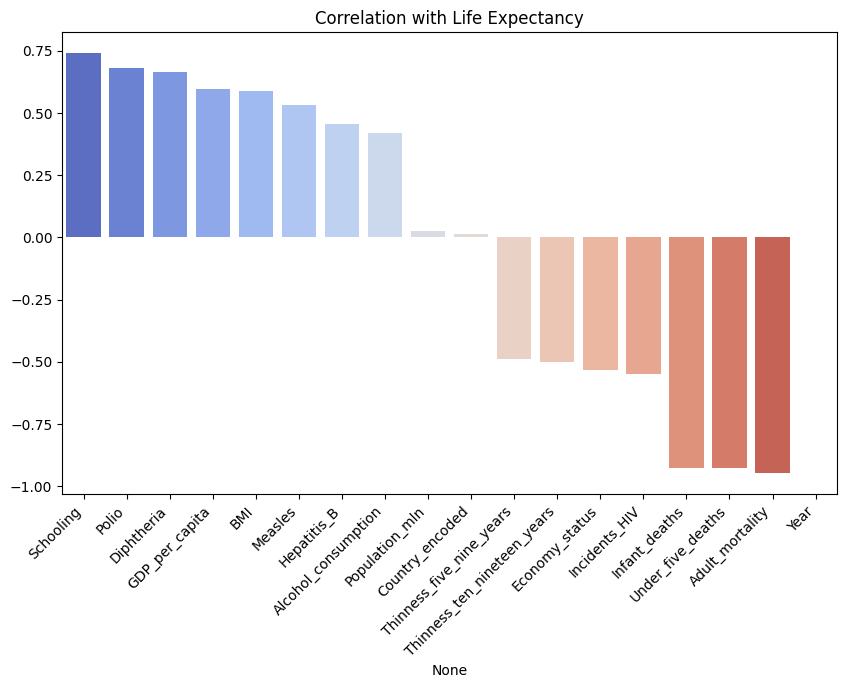

In [268]:
import seaborn as sns
import matplotlib.pyplot as plt

# 수치형 데이터만 선택하여 상관계수 계산
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr()

# 기대수명과 다른 변수들 간의 상관계수만 뽑기
life_expectancy_corr = corr_matrix['Life_expectancy'].drop('Life_expectancy')  # 자기 자신과의 관계 제거

# 기대수명과의 상관계수를 내림차순으로 정렬
life_expectancy_corr_sorted = life_expectancy_corr.sort_values(ascending=False)

# 결과 출력
print(life_expectancy_corr_sorted)

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=life_expectancy_corr_sorted.index, y=life_expectancy_corr_sorted.values, palette='coolwarm')
plt.title('Correlation with Life Expectancy')
plt.xticks(rotation=45, ha='right')
plt.show()


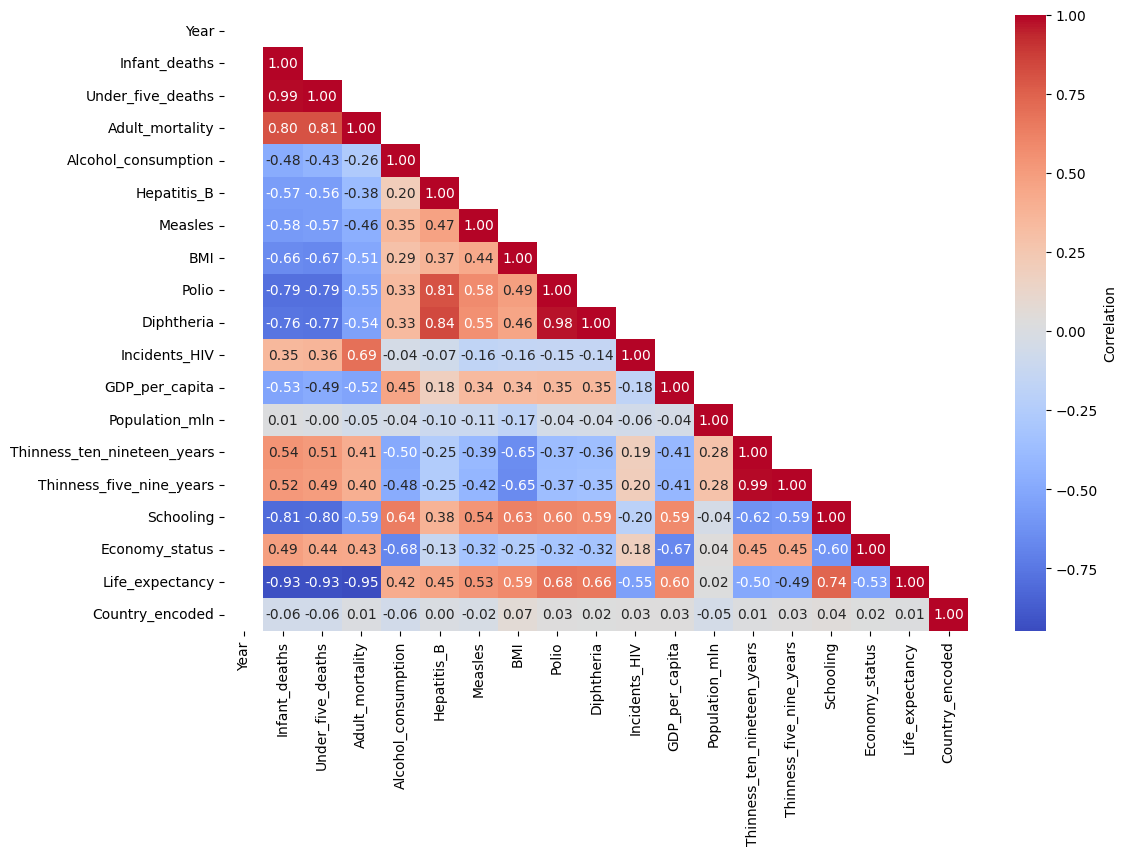

In [269]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 수치형 데이터만 선택하여 상관계수 계산
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr()

# 자기 자신과의 관계 제거
corr_matrix = corr_matrix.where(~np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# 히트맵 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar_kws={'label': 'Correlation'})
plt.show()


### 변수간 상관관계 분석(VIF 계산 및 다중 공선성 해결)

In [270]:
!pip install statsmodels

In [271]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import pandas as pd

# 수치형 변수만 선택 (국가 이름과 같은 범주형 변수는 제외)
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# 상수 항 추가 (모델의 절편을 포함)
df_numeric_const = add_constant(df_numeric)

# VIF 계산
vif_data = pd.DataFrame()
vif_data["Variable"] = df_numeric_const.columns
vif_data["VIF"] = [variance_inflation_factor(df_numeric_const.values, i) for i in range(df_numeric_const.shape[1])]

# VIF 출력
print(vif_data)


                       Variable          VIF
0                          Year  5979.413761
1                 Infant_deaths    51.545600
2             Under_five_deaths    61.300625
3               Adult_mortality    27.191129
4           Alcohol_consumption     2.708740
5                   Hepatitis_B     4.133808
6                       Measles     1.867686
7                           BMI     2.978077
8                         Polio    24.151475
9                    Diphtheria    26.706093
10                Incidents_HIV     2.914893
11               GDP_per_capita     2.571161
12               Population_mln     1.190803
13  Thinness_ten_nineteen_years    40.783668
14     Thinness_five_nine_years    40.943215
15                    Schooling     5.023130
16               Economy_status     3.071527
17              Life_expectancy    59.579734
18              Country_encoded     1.064154


### 다중 공선성(Multicollinearity)

- 회귀 분석에서 독립 변수들 간에 강한 상관관계가 존재하는 상황 
- 즉. 여러 독립 변수들이 서로 매우 비슷한 정보를 가지고 있을 떄 발생하는 문제 
- 보통 VIF 값이 10이상일 때 제거 

- Year: 매우 높은 VIF 값이므로 제거
- Infant_deaths 및 Under_five_deaths: 이 두 변수는 높은 VIF 값을 가지고 있으므로 둘 중 하나를 제거 -> 좀 더 포괄적인 Under_five_deaths 남김 
- Thinness_ten_nineteen_years 및 Thinness_five_nine_years: 두 변수는 비슷한 정보를 가질 수 있으므로 하나를 제거 -> 좀 더 포괄적인 Thinness_ten_nineteen_years 남김

In [272]:
# 제거할 컬럼 리스트
columns_to_drop = ['Year', 'Infant_deaths', 'Thinness_five_nine_years', 'Country_encoded', 'Country', 'Region']

# 데이터프레임에서 컬럼 제거
df.drop(columns=columns_to_drop, inplace=True)

# 결과 확인
print(df.columns)
print(df.head())

Index(['Under_five_deaths', 'Adult_mortality', 'Alcohol_consumption',
       'Hepatitis_B', 'Measles', 'BMI', 'Polio', 'Diphtheria', 'Incidents_HIV',
       'GDP_per_capita', 'Population_mln', 'Thinness_ten_nineteen_years',
       'Schooling', 'Economy_status', 'Life_expectancy', 'Region_Africa',
       'Region_Asia', 'Region_Central America and Caribbean',
       'Region_European Union', 'Region_Middle East', 'Region_North America',
       'Region_Oceania', 'Region_Rest of Europe', 'Region_South America'],
      dtype='object')
   Under_five_deaths  Adult_mortality  Alcohol_consumption  Hepatitis_B  \
0           98.61250       265.804969             0.016125      64.5625   
1           17.14375        83.132969             4.696875      98.0000   
2           31.19375       113.439281             0.400625      88.3125   
3          144.16250       297.844063             4.935625      68.8125   
4           11.51875       142.478813             7.755000      98.2500   

   Measles    

In [273]:
# 수치형 변수만 선택 (국가 이름과 같은 범주형 변수는 제외)
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# 상수 항 추가 (모델의 절편을 포함)
df_numeric_const = add_constant(df_numeric)

# VIF 계산
vif_data = pd.DataFrame()
vif_data["Variable"] = df_numeric_const.columns
vif_data["VIF"] = [variance_inflation_factor(df_numeric_const.values, i) for i in range(df_numeric_const.shape[1])]

# VIF 출력
print(vif_data)


                       Variable          VIF
0                         const  5890.491696
1             Under_five_deaths    21.169054
2               Adult_mortality    27.101760
3           Alcohol_consumption     2.625567
4                   Hepatitis_B     4.053303
5                       Measles     1.722167
6                           BMI     2.864694
7                         Polio    23.920165
8                    Diphtheria    26.362535
9                 Incidents_HIV     2.874298
10               GDP_per_capita     2.494506
11               Population_mln     1.186632
12  Thinness_ten_nineteen_years     2.471604
13                    Schooling     4.909519
14               Economy_status     3.021907
15              Life_expectancy    59.014648


#### 로그 변환

In [274]:
# # 숫자형 컬럼만 선택해서 왜도 계산
# numeric_df = df.select_dtypes(include=[np.number])

# # 1. 왜도 계산
# skewness = numeric_df.skew()

# # 2. 왜도가 1보다 큰 컬럼들 확인
# skewed_columns = skewness[skewness > 1].index
# print("왜도가 1보다 큰 컬럼들:")
# print(skewed_columns)

# # 3. 로그 변환 적용
# df[skewed_columns] = df[skewed_columns].apply(np.log1p)

# # 4. 변환 후 왜도 다시 확인
# new_skewness = df[skewed_columns].skew()
# print("\n로그 변환 후 왜도 (Skewness):")
# print(new_skewness)

# # 5. 왜도가 큰 컬럼에 대해 시각화
# for column in skewed_columns:
#     plt.figure(figsize=(10, 6))
#     plt.subplot(1, 2, 1)
#     df[column].hist(bins=50)
#     plt.title(f'{column} 원본 데이터 분포')

#     plt.subplot(1, 2, 2)
#     np.log1p(df[column]).hist(bins=50)
#     plt.title(f'{column} 로그 변환 후 분포')

#     plt.show()


### 데이터 분할

In [275]:
from sklearn.model_selection import train_test_split

# 특성과 타겟 변수 설정
X = df.drop('Life_expectancy', axis=1)[:-1]
y = df['Life_expectancy'][:-1]

# 마지막 데이터 분리 (korea_data)
korea_data = df.iloc[[-1]]  # 마지막 데이터 행
X_korea = korea_data.drop(columns=['Life_expectancy'])
y_korea = korea_data['Life_expectancy']

# 데이터 분할 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 2. 데이터 전처리

#### 2-1. 스케일링(Scaling)

In [276]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 예시 데이터프레임을 사용 (실제 데이터프레임을 사용해야 합니다)
# df = pd.read_csv('your_data.csv')  # 여기에 실제 데이터 파일을 넣으면 됩니다.

# 특성과 타겟 변수 설정
X = df.drop('Life_expectancy', axis=1)  # 특성 변수 (타겟 제외)
y = df['Life_expectancy']  # 타겟 변수

# 데이터 분할 (훈련 데이터 80%, 테스트 데이터 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 스케일링 객체 생성
scaler = StandardScaler()

# 훈련 데이터에 스케일링 적용
X_train_scaled = scaler.fit_transform(X_train)

# 테스트 데이터에 동일한 스케일링 적용 (훈련 데이터의 통계량 사용)
X_test_scaled = scaler.transform(X_test)

# 스케일링 전 후 비교 (훈련 데이터)
train_mean = np.mean(X_train_scaled, axis=0)
train_std = np.std(X_train_scaled, axis=0)

# 스케일링 전 후 비교 (테스트 데이터)
test_mean = np.mean(X_test_scaled, axis=0)
test_std = np.std(X_test_scaled, axis=0)

# 스케일링 전후 비교 출력
print("훈련 데이터 평균:", train_mean)
print("훈련 데이터 표준편차:", train_std)

print("\n테스트 데이터 평균:", test_mean)
print("테스트 데이터 표준편차:", test_std)

# 추가적으로, 스케일링 전후 데이터의 상위 5개 샘플 출력
print("\n스케일링 전 훈련 데이터 (상위 5개 샘플):")
print(X_train.head())

print("\n스케일링 후 훈련 데이터 (상위 5개 샘플):")
print(pd.DataFrame(X_train_scaled, columns=X_train.columns).head())


훈련 데이터 평균: [ 2.46716228e-17 -3.08395285e-17  1.23358114e-17  0.00000000e+00
 -9.86864911e-17  6.16790569e-16  5.98286852e-16  1.54197642e-16
  6.16790569e-18  2.46716228e-17  0.00000000e+00  2.34380416e-16
 -3.70074342e-17 -4.31753398e-17  5.85951041e-17  1.23358114e-17
 -3.70074342e-17 -6.16790569e-18 -3.08395285e-18  2.46716228e-17
 -3.08395285e-17  0.00000000e+00  4.93432455e-17]
훈련 데이터 표준편차: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

테스트 데이터 평균: [ 0.04079167 -0.05766421  0.03890897 -0.19414729  0.11537686 -0.13470393
 -0.0798628  -0.13553439 -0.02862992  0.19805119 -0.22073987 -0.18263243
 -0.0042132  -0.14037248 -0.01538826 -0.1490712  -0.08838835  0.26675437
 -0.32816506  0.11867817  0.48653363 -0.12116095  0.0860663 ]
테스트 데이터 표준편차: [9.93419382e-01 8.00703564e-01 9.96366833e-01 1.20803582e+00
 6.92224964e-01 8.49665240e-01 1.01606474e+00 1.15497383e+00
 6.37131100e-01 1.43041181e+00 1.04333379e-01 9.07455568e-01
 1.10431150e+00 1.09409521e+00 9.925128

### 3. 모델 학습 및 평가

In [277]:
from sklearn.metrics import mean_squared_error             # MSE (평균 제곱 오차)
from sklearn.metrics import root_mean_squared_error        # RMSE (제곱 평균 제곱근 오차)
from sklearn.metrics import mean_absolute_error            # MAE (평균 절대 오차)
from sklearn.metrics import mean_squared_log_error         # MSLE (평균 제곱 로그 오차)
from sklearn.metrics import root_mean_squared_log_error    # RMSLE (제곱 평균 제곱근 로그 오차)
from sklearn.metrics import r2_score                       # R^2 결정계수
from scipy.stats import norm

def evaluataion(y_true, y_pred):
    print('mse: ',mean_squared_error(y_true, y_pred))
    print('rmse: ',root_mean_squared_error(y_true, y_pred))
    print('mae: ', mean_absolute_error(y_true, y_pred))
    print('msle: ',mean_squared_log_error(y_true, y_pred))
    print('rmsle: ',root_mean_squared_log_error(y_true, y_pred))
    print('r2_score: ',r2_score(y_true, y_pred))
    
    plt.figure(figsize=(10, 5))

    # 산점도 그래프
    plt.subplot(1, 2, 1)
    plt.scatter(y_true, y_pred, alpha=0.5, color='blue', label='Predictions')
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], '--', color='red', label='Perfect Fit')
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Actual vs Predicted")
    plt.legend()

    # 잔차 시각화
    plt.subplot(1, 2, 2)
    residuals = y_true - y_pred
    mean_residuals = np.mean(residuals)
    std_residuals = np.std(residuals)

    # 히스토그램
    sns.histplot(residuals, bins=30, kde=True, color='green', edgecolor='black', alpha=0.7, stat="density", label="Residuals")
    sns.kdeplot(residuals, color='blue', linestyle='--', label='residuals_line')
    
    # 정규분포 곡선
    x_range = np.linspace(min(residuals), max(residuals), 100)
    plt.plot(x_range, norm.pdf(x_range, mean_residuals, std_residuals), color='red', linestyle='--', label="Normal Dist.")

    # plt.axvline(x=0, color='blue', linestyle='--', label="Zero Residual")
    plt.xlabel("Residuals")
    plt.ylabel("Density")
    plt.title("Residual Distribution (with Normal Curve)")
    plt.legend()
    plt.tight_layout()
    plt.show()

In [278]:
def korea_pred(model):

    # 마지막 데이터 예측 (korea_data 사용)
    y_pred = model.predict(X_korea)

    # 실제값 (마지막 데이터의 실제 값)
    actual_value = y_korea.iloc[0]

    # 예측값과 실제값 출력
    print(f"예측값: {y_pred[0]}")
    print(f"실제값: {actual_value}")

    # 예측값과 실제값의 차이 확인 (오차)
    error = abs(actual_value - y_pred[0])
    print(f"예측 오차: {error}")

#### 3-1. Linear Regression

Linear Regression MAE: 1.02, MSE: 1.49
mse:  1.4913959972072577
rmse:  1.221227250435912
mae:  1.0156106631086173
msle:  0.0003064044298965491
rmsle:  0.01750441172666334
r2_score:  0.9804507261666843


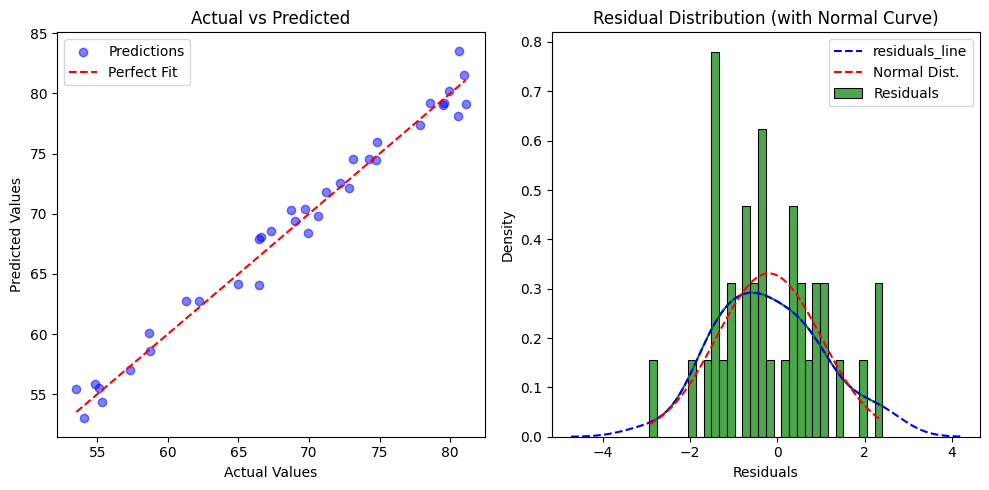

예측값: 3879.6870393056056
실제값: 79.16
예측 오차: 3800.5270393056057


c:\Users\Playdata\AppData\Local\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [279]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 모델 생성 및 학습
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# 예측 및 평가
y_pred_lr = lr_model.predict(X_test_scaled)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)

print(f"Linear Regression MAE: {mae_lr:.2f}, MSE: {mse_lr:.2f}")

evaluataion(y_test, y_pred_lr)
korea_pred(lr_model)

#### 3-2. Random Forest Regressor

Random Forest MAE: 1.08, MSE: 2.00
mse:  2.0011177173871664
rmse:  1.4146086799490403
mae:  1.0821555555555635
msle:  0.0004981459851722884
rmsle:  0.022319184240744295
r2_score:  0.9737692750261117


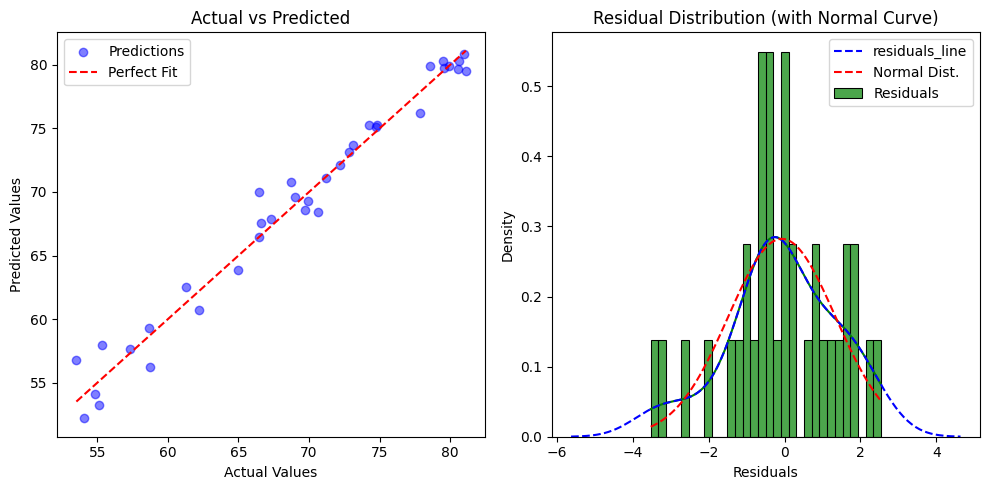

예측값: 52.643499999999996
실제값: 79.16
예측 오차: 26.5165


c:\Users\Playdata\AppData\Local\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [280]:
from sklearn.ensemble import RandomForestRegressor

# 모델 생성 및 학습
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# 예측 및 평가
y_pred_rf = rf_model.predict(X_test_scaled)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)

print(f"Random Forest MAE: {mae_rf:.2f}, MSE: {mse_rf:.2f}")

evaluataion(y_test, y_pred_rf)
korea_pred(rf_model)


#### 3-3. XGBoost Regressor

mse:  2.378311316183859
rmse:  1.542177459368363
mae:  1.026507398817274
msle:  0.0006005735284151595
rmsle:  0.024506601731271505
r2_score:  0.968825007397086


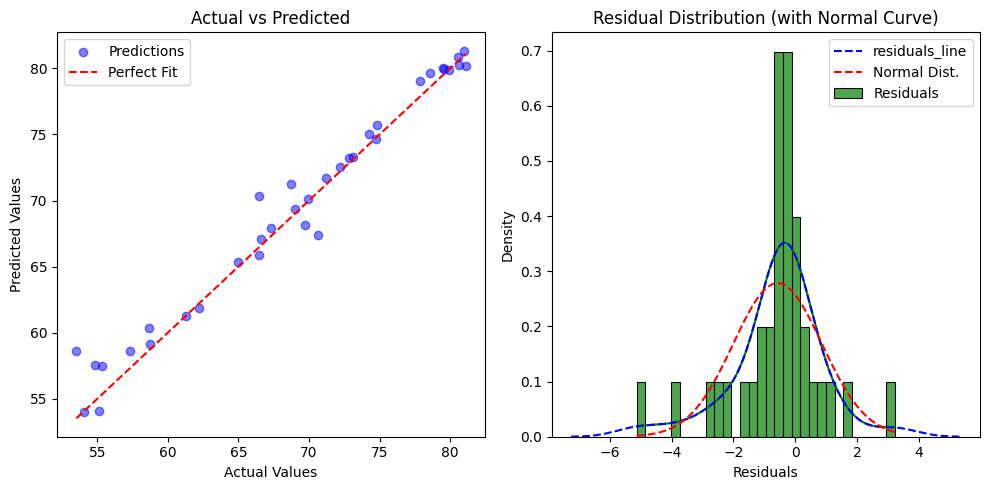

XGBoost MAE: 1.03, MSE: 2.38
예측값: 53.53619384765625
실제값: 79.16
예측 오차: 25.623806152343747


In [281]:
import xgboost as xgb



# 모델 생성 및 학습
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# 예측 및 평가
y_pred_xgb = xgb_model.predict(X_test_scaled)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)

evaluataion(y_test, y_pred_xgb)

print(f"XGBoost MAE: {mae_xgb:.2f}, MSE: {mse_xgb:.2f}")

korea_pred(xgb_model)




### 4. 모델 성능 향상 시도

#### 4-1. 앙상블 모델

Ensemble Model MAE: 0.88, MSE: 1.31
mse:  1.3128404231280095
rmse:  1.1457924869399387
mae:  0.8757997586393559
msle:  0.00031649029914294197
rmsle:  0.017790174230258173
r2_score:  0.9827912392287258


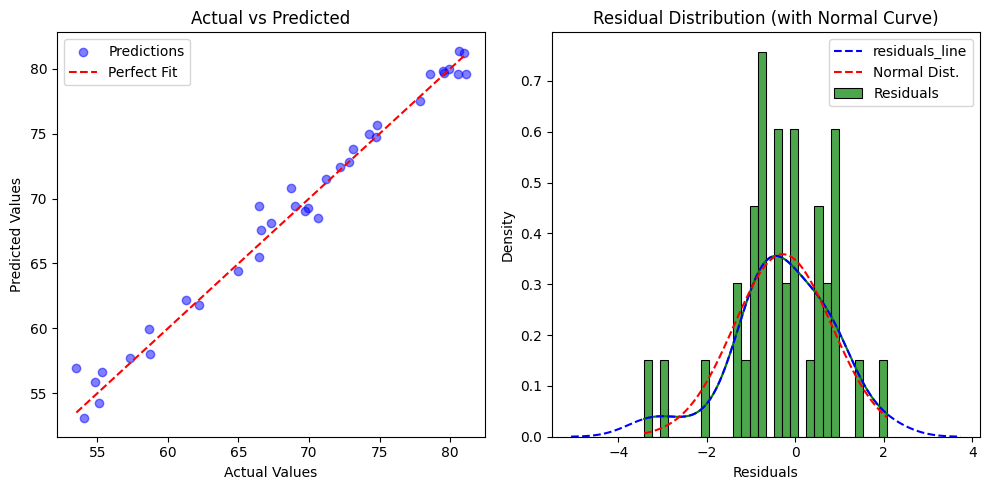

예측값: 1328.6222443844206
실제값: 79.16
예측 오차: 1249.4622443844205


c:\Users\Playdata\AppData\Local\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
c:\Users\Playdata\AppData\Local\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [282]:
from sklearn.ensemble import VotingRegressor

# 앙상블 모델 (Voting Regressor)
ensemble_model = VotingRegressor(estimators=[('lr', lr_model), ('rf', rf_model), ('xgb', xgb_model)])
ensemble_model.fit(X_train_scaled, y_train)

# 예측 및 평가
y_pred_ensemble = ensemble_model.predict(X_test_scaled)
mae_ensemble = mean_absolute_error(y_test, y_pred_ensemble)
mse_ensemble = mean_squared_error(y_test, y_pred_ensemble)

print(f"Ensemble Model MAE: {mae_ensemble:.2f}, MSE: {mse_ensemble:.2f}")

evaluataion(y_test, y_pred_ensemble)
korea_pred(ensemble_model)

### 5. 성능 평가 및 최적화

In [283]:
from sklearn.model_selection import GridSearchCV

# 예: XGBoost 하이퍼파라미터 튜닝
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1]
}

grid_search = GridSearchCV(estimator=xgb.XGBRegressor(random_state=42), param_grid=param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

print(f"Best parameters for XGBoost: {grid_search.best_params_}")


Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


### 6. 피드백 및 개선

Mean Squared Error: 1.9805490820634841
mse:  1.9805490820634841
rmse:  1.4073198222378183
mae:  1.0142518573337131
msle:  0.0004859605333474657
rmsle:  0.02204451254501822
r2_score:  0.9740388894578744


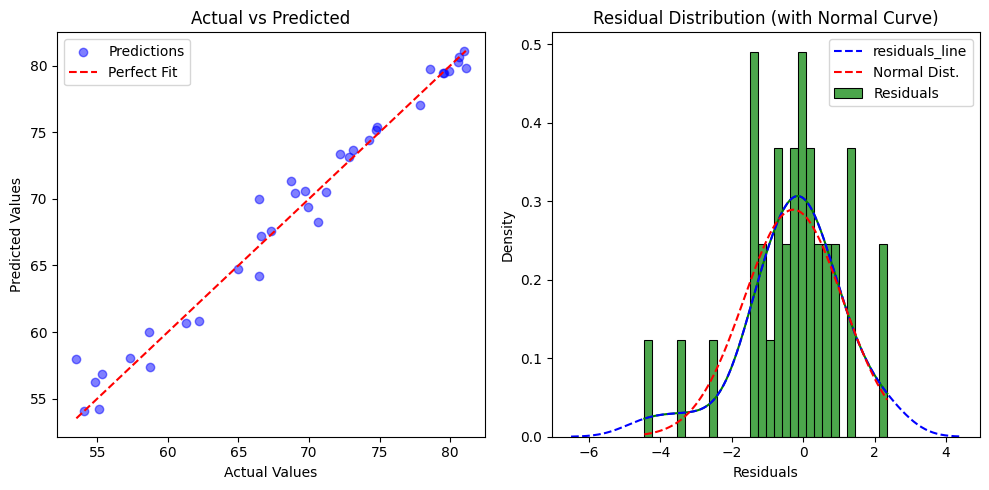

예측값: 79.21223449707031
실제값: 79.16
예측 오차: 0.05223449707031591


In [284]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

# 최적 하이퍼파라미터 설정(최적의 해를 찾지 못한 것 같음음)
best_params = {
    'learning_rate': 0.1,
    'max_depth': 3,
    'n_estimators': 200
}

# XGBoost 모델 정의
xgb_model = xgb.XGBRegressor(**best_params)

# 훈련 데이터와 테스트 데이터 분리 (예시)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 훈련
xgb_model.fit(X_train, y_train)

# 예측
y_pred = xgb_model.predict(X_test)

# 평가
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

evaluataion(y_test, y_pred)
korea_pred(xgb_model)

* 결론:
    - 하이퍼파라미터 최적화로 인한 모델의 일반화 성능의 저하.

* 개선 방법:
    - 교차 검증
    - 모델의 과적합을 방지(max_depth, n_estimators 등)
    - Grid search나 Random search

#### 6-1 XGBoost 하이퍼파라미터 최적화

##### 6-1-2. RandomizedSearchCV로 하이퍼파라미터 튜닝

In [285]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
import numpy as np

# 하이퍼파라미터 공간 정의
param_dist = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 10],
    'n_estimators': np.arange(100, 1001, 100),
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'min_child_weight': [1, 5, 10]
}

# XGBoost 모델 정의
model = xgb.XGBRegressor(objective='reg:squarederror')

# RandomizedSearchCV 적용
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=100, cv=5, scoring='neg_mean_absolute_error', random_state=42)
random_search.fit(X_train, y_train)

# 최적의 파라미터와 성능 출력
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best CV Score: {-random_search.best_score_}")


Best Parameters: {'subsample': 0.8, 'n_estimators': np.int64(1000), 'min_child_weight': 5, 'max_depth': 3, 'learning_rate': 0.01, 'colsample_bytree': 1.0}
Best CV Score: 1.1660608564480186


#### 하이퍼파라미터 재 적용

MAE: 1.0269225226508238
MSE: 1.8656446300347709
mse:  1.8656446300347709
rmse:  1.3658860238082717
mae:  1.0269225226508238
msle:  0.0004597050266680616
rmsle:  0.021440732885516334
r2_score:  0.9755450612603889


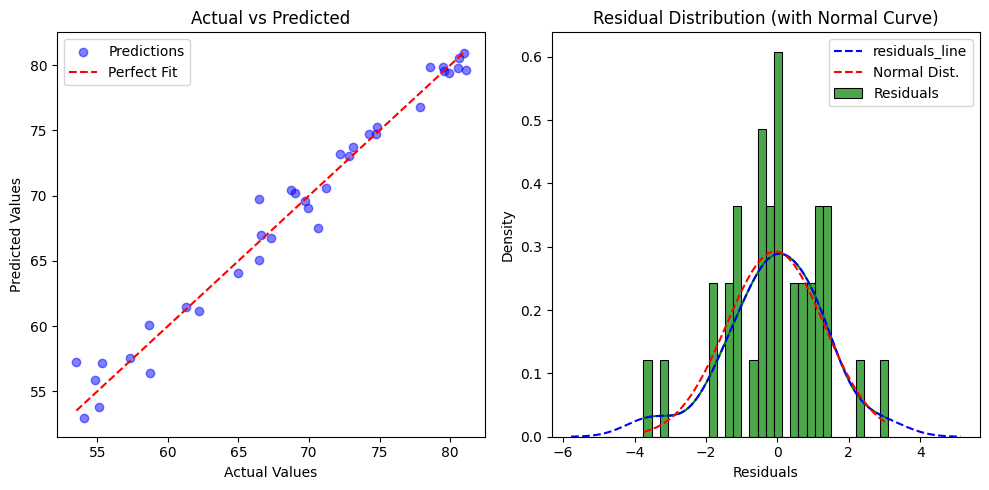

예측값: 79.27600860595703
실제값: 79.16
예측 오차: 0.11600860595703466


In [286]:
import xgboost as xgb

# 최적 하이퍼파라미터 설정
params = {
    'subsample': 0.8,
    'n_estimators': 1000,
    'min_child_weight': 5,
    'max_depth': 6,
    'learning_rate': 0.01,
    'colsample_bytree': 1.0
}

# XGBoost 모델 초기화
xgb_model = xgb.XGBRegressor(
    subsample=params['subsample'],
    n_estimators=params['n_estimators'],
    min_child_weight=params['min_child_weight'],
    max_depth=params['max_depth'],
    learning_rate=params['learning_rate'],
    colsample_bytree=params['colsample_bytree']
)

# 모델 훈련
xgb_model.fit(X_train, y_train)

# 예측
y_pred = xgb_model.predict(X_test)

# 예측 결과 확인 (필요시 평가 지표 출력)
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")

evaluataion(y_test, y_pred)
korea_pred(xgb_model) # 여전히 개선되지 않은 모습??
